# **Histogram equalization**

Histogram: measures the gray scale distribution in an image.

In [4]:
!curl -o before_eq.png https://i.imgur.com/Q7bHqO8.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  635k  100  635k    0     0   314k      0  0:00:02  0:00:02 --:--:--  314k


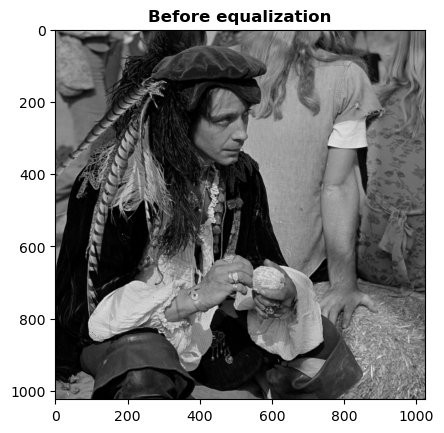

<Figure size 640x480 with 0 Axes>

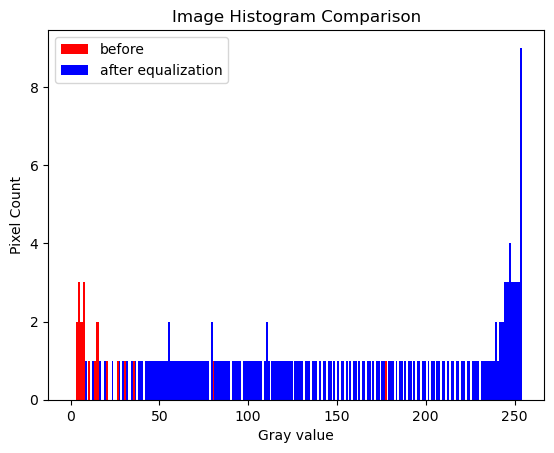

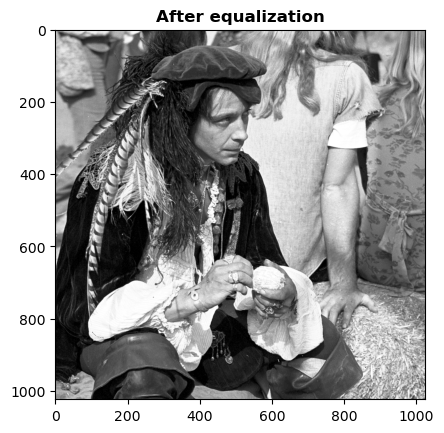

In [10]:
import skimage
import skimage.io
import numpy as np
from matplotlib import pyplot as plt

L = 256

def instantiate_histogram():
    hist_dict= []
    for i in range (L):
        hist_dict.append(0)
    return hist_dict

def count_img_intensity(image, histogram):
    for row in image:
        for column in row:
            #count the number of times a certain color from 0 to 255 appear 
            histogram[column] = histogram[column] + 1
    return histogram

def get_prob_distribution(image, histogram):
    pixels = image.shape[0] (* image.shape[1]
    prob_dist = []
    for i in range(L):
        #get the probabilistic distribution of each color based in the histogram
        prob_dist.append(histogram [i] / pixels)
    return prob_dist

def get_accprob_distribution(prob_dist):
    accprob_dist = []
    accprob = 0
    for i in rangeL):
        if i != 0:
            accprob += prob_dist[i-1]
        accprob_dist.append(prob_dist[i] + accprob)
    return accprob_dist

def equalized_histogram(accprob_dist):
    eq_hist = []
    for i in range(L):
        eq_hist.append(np.ceil(accprob_dist[i] * (L-1)))
    return eq_hist

def equalize_image(img, eq_hist):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            color = int(img[row][column])
            img[row][column] = eq_hist[color]
    return img

def plot_hist(hist, eq_hist):
    fig = plt.subplots(1, 1)
    plt.hist(hist, bins=range(0, 255), color='red', label='before')
    plt.hist(eq_hist, bins=range(0, 255), color='blue', label='after equalization')
    plt.legend(prop={'size': 10})
    plt.title("Image Histogram Comparison")
    plt.xlabel("Gray value")
    plt.ylabel("Pixel Count")
    plt.show()
    plt.figure()

def main():
    image = skimage.io.imread('before_eq.png')
    plt.title('Before equalization',  
                                     fontweight ="bold") 
    plt.imshow(image, 'gray')
    plt.figure()
    
    histogram = instantiate_histogram()
    histogram = count_img_intensity(image, histogram)
    prob_dist = get_prob_distribution(image, histogram)
    accprob_dist = get_accprob_distribution(prob_dist)
    eq_histogram = equalized_histogram(accprob_dist)
    
    after_eq = equalize_image(image.copy(), eq_histogram)
    plot_hist(histogram, eq_histogram)
    
    plt.title('After equalization',  
                                     fontweight ="bold") 
    plt.imshow(after_eq, 'gray')

if __name__ == "__main__":
    main()

# **Otsu's Thresholding Technique**

Otsu's thresholding technique separates pixels in two classes: foreground and background based in the grayscale intensity, the algorithm is used for image segmentation.

In [12]:
!curl -o leaf_rgb.jpg https://st2.depositphotos.com/2577341/6174/i/600/depositphotos_61747611-stock-photo-green-leaf.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26952  100 26952    0     0  25723      0  0:00:01  0:00:01 --:--:-- 25742


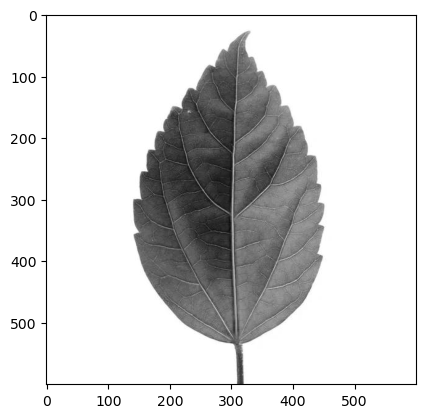

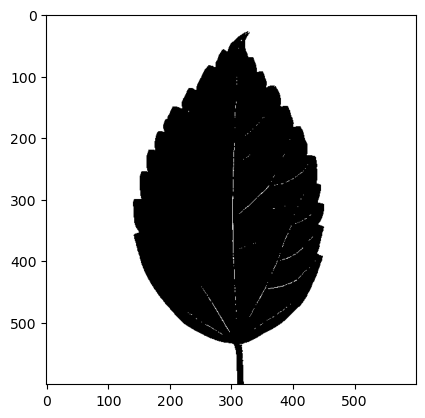

In [17]:
import skimage
import skimage.io
import numpy as np
import math
from PIL import Image

def rgb_to_grayscale(img):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            # pixel = [R, G, B]
            pixel = img[row][column]
            # convert to grayscale using luminosity
            img[row][column] = math.floor(pixel[0]*0.3 + pixel[1]*0.59 + pixel[2]*0.11)
    return img[:,:,0]

def apply_threshold_image(img,th):
    thresholded_image = np.zeros(img.shape, dtype=np.uint8)
    thresholded_image[img >= th] = np.uint8(255)
    return thresholded_image

def compute_otsu(img, threshold, prob_dist):
    num_pixels = img.size
    # class probability
    weight0, weight1 = 0, 0
    for i in range(L):
        if i < threshold:
            weight0 += prob_dist[i]
        else:
            weight1 += prob_dist[i]
    # if the class has 0 pixels, ignore the threshold
    if weight1 == 0 or weight0 == 0:
        return 0
    # intensity values' mean for each class
    mean0, mean1 = 0, 0
    for i in range(L):
        if i < threshold:
            mean0 += i*prob_dist[i] / weight0
        else:
            mean1 += i*prob_dist[i] / weight1
    # interclass variance
    return weight0 * weight1 * (mean0 - mean1)**2

def find_best_threshold(img):
    threshold_range = range(L)
    
    histogram = instantiate_histogram()
    histogram = count_img_intensity(img, histogram)
    prob_dist = get_prob_distribution(img, histogram)
    
    values = [compute_otsu(img, threshold, prob_dist) for threshold in threshold_range]
    
    # best threshold = greater interclass variance
    best_threshold = threshold_range[np.argmax(values)]
    return best_threshold

def main():
    image = skimage.io.imread('leaf_rgb.jpg')
    skimage.io.imsave('leaf_grayscale.jpg', rgb_to_grayscale(image.copy()))
    image = skimage.io.imread('leaf_grayscale.jpg')
    plt.imshow(image, 'gray')
    plt.figure()
    
    thresholded_image = apply_threshold_image(image.copy(), find_best_threshold(image.copy()))
    skimage.io.imsave('leaf_otsu.jpg', thresholded_image)
    plt.imshow(thresholded_image, 'gray')

if __name__ == "__main__":
    main()
